# Vehicle Crash Data Analysis

## Objective
The objective of this analysis is to understand the factors that contribute to vehicle crashes and to identify trends and patterns in the data that can help prevent future accidents. The analysis will be conducted using Python programming language and the dataset used for the analysis is the National Highway Traffic Safety Administration (NHTSA) Fatality Analysis Reporting System (FARS) dataset.

## Source
The data for this analysis was obtained from the NHTSA's FARS website (https://www.nhtsa.gov/research-data/fatality-analysis-reporting-system-fars). The FARS dataset contains information on all motor vehicle crashes that occur on public roads in the United States and that result in the death of one or more persons within 30 days of the crash.

### Loading data

In [1]:
import pandas as pd

# Load the FARS dataset into Python using Pandas library
accident_2020 = pd.read_csv('FARS2020NationalCSV/accident.CSV', encoding='iso-8859-1')
person_2020 = pd.read_csv('FARS2020NationalCSV/person.csv', encoding='iso-8859-1')
violation_2020 = pd.read_csv('FARS2020NationalCSV/Violatn.CSV', encoding='iso-8859-1')

Change `Panda`'s `set_option` so that all rows and columns are visible

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_item', None)

### Check for missing numbers

In [3]:
# Check for missing values
acc_test = accident_2020.isnull().sum()
acc_test[acc_test > 0]

TWAY_ID2    26997
dtype: int64

Note on missing values:

The are null values for `TWAY_ID2`. This data element records the trafficway on which the crash occurred which was changed to current code i 2004. Prior to that, the code was `TWAY_ID`. Thus, the null values should not be removed. Ref. Fatality Analysis Reporting System Analytical User’s Manual (1975-2020) for more details. 

In [4]:
person_test = person_2020.isnull().sum()
person_test[person_test > 0]

MAKE                 8172
MAKENAME             8172
MAK_MOD              8172
BODY_TYP             8172
BODY_TYPNAME         8172
MOD_YEAR             8172
MOD_YEARNAME         8172
TOW_VEH              8172
TOW_VEHNAME          8172
SPEC_USE             8172
SPEC_USENAME         8172
EMER_USE             8172
EMER_USENAME         8172
ROLLOVER             8172
ROLLOVERNAME         8172
IMPACT1              8172
IMPACT1NAME          8172
FIRE_EXP             8172
FIRE_EXPNAME         8172
VPICMAKE             8172
VPICMAKENAME         8172
VPICMODEL            8172
VPICMODELNAME        8172
VPICBODYCLASS        8172
VPICBODYCLASSNAME    8172
ICFINALBODY          8172
ICFINALBODYNAME      8172
dtype: int64

After reviewing the FARS Analytical User Manual, the value of 0 for VEH_NO is used for non-motorists (pedestrains, cyclists, etc.) in the "Person File". There are no correspoding vehicle records for non-motorist. Thus, 'MAKE', 'MAK_MOD' etc are missing.

In [5]:
drop_col_list = person_test[person_test > 0].index

In [6]:
person_2020.drop(drop_col_list, axis = 1, inplace=True)

In [7]:
vio_test = violation_2020.isnull().sum()
vio_test[vio_test > 0]

Series([], dtype: int64)

### Check for dublicate values

In [8]:
accident_2020.duplicated().sum()

0

In [9]:
person_2020.duplicated().sum()

0

In [10]:
violation_2020.duplicated().sum()

0

## Exploratory data analysis

### Data Preprocessing

1. Load the FARS dataset into Python using Pandas library.
2. Check for missing values and remove them if any. Care should be taken of the extent of missing values. If missing value are extensive, it would require different treatment.
3. Check for duplicate records and remove them if any.
4. Check for invalid or inconsistent data and correct them if any.

In [181]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_palette("pastel")

In [182]:
person_2020.iloc[ :, ].describe()

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,DAYNAME,MONTH,HOUR,MINUTE,RUR_URB,FUNC_SYS,HARM_EV,MAN_COLL,SCH_BUS,AGE,SEX,PER_TYP,INJ_SEV,SEAT_POS,REST_USE,REST_MIS,AIR_BAG,EJECTION,EJ_PATH,EXTRICAT,DRINKING,ALC_DET,ALC_STATUS,ATST_TYP,ALC_RES,DRUGS,DRUG_DET,DSTATUS,HOSPITAL,DOA,DEATH_DA,DEATH_MO,DEATH_YR,DEATH_HR,DEATH_MN,DEATH_TM,LAG_HRS,LAG_MINS,WORK_INJ,HISPANIC,LOCATION,HELM_USE,HELM_MIS
count,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,83428.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.00000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000,85885.000000
mean,26.940874,270234.075124,1.808220,1.318472,1.483414,0.098818,93.226256,15.720300,15.720300,6.920615,13.996600,29.132049,1.676090,5.734471,15.804320,2.464307,0.002596,39.274380,1.483821,1.698807,2.549595,12.940083,26.097968,3.474250,26.827653,1.553973,0.647773,0.314572,4.12540,7.709018,2.021424,18.194865,705.706165,4.514048,7.160307,2.102614,1.983257,1.889247,56.699331,52.830203,5912.010363,57.173010,63.942376,5781.243419,596.382931,65.021878,5.027048,10.078454,1.202317,27.119846,6.792408
std,16.381135,163703.807521,1.010749,0.843136,1.394304,0.313416,98.466606,8.829283,8.829283,3.335317,9.225874,18.062387,0.859732,13.862103,12.222123,6.187505,0.050890,19.715072,1.176561,1.320478,1.865300,11.543588,35.394718,3.598812,31.176225,3.056516,2.262010,1.403363,4.03434,2.768267,2.875072,36.833457,435.968611,4.025920,2.185568,3.009337,2.444336,3.140650,36.481962,40.463703,3424.265118,37.672555,31.623591,3796.462827,482.849409,42.118642,3.931834,25.964568,5.579727,22.984455,1.472268
min,1.000000,10001.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,12.000000,121909.000000,1.000000,1.000000,1.000000,0.000000,31.000000,8.000000,8.000000,4.000000,8.000000,14.000000,1.000000,3.000000,9.000000,0.000000,0.000000,24.000000,1.000000,1.000000,0.000000,11.000000,3.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.00000,9.000000,0.000000,0.000000,160.000000,0.000000,8.000000,0.000000,0.000000,0.000000,18.000000,8.000000,2020.000000,16.000000,35.000000,1649.000000,0.000000,18.000000,0.000000,0.000000,0.000000,20.000000,7.000000
50%,26.000000,260658.000000,2.000000,1.000000,1.000000,0.000000,71.000000,16.000000,16.000000,7.000000,15.000000,30.000000,2.000000,4.000000,12.000000,1.000000,0.000000,36.000000,1.000000,1.000000,3.000000,11.000000,8.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.00000,9.000000,0.000000,0.000000,996.000000,8.000000,8.000000,0.000000,0.000000,0.000000,88.000000,88.000000,8888.000000,88.000000,88.000000,8888.000000,999.000000,99.000000,8.000000,0.000000,0.000000,20.000000,7.000000
75%,42.000000,420398.000000,2.000000,2.000000,2.000000,0.000000,117.000000,23.000000,23.000000,10.000000,19.000000,44.000000,2.000000,5.000000,12.000000,6.000000,0.000000,54.000000,2.000000,2.000000,4.000000,13.000000,20.000000,7.000000,20.000000,1.000000,0.000000,0.000000,8.00000,9.000000,2.000000,1.000000,996.000000,8.000000,8.000000,2.000000,5.000000,7.000000,88.000000,88.000000,8888.000000,88.000000,88.000000,8888.000000,999.000000,99.000000,8.000000,7.000000,0.000000,20.000000,

In [183]:
person_2020['STATENAME'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [184]:
person_2020['RUR_URBNAME'].unique()

array(['Rural', 'Urban', 'Trafficway Not in State Inventory', 'Unknown',
       'Not Reported'], dtype=object)

In [185]:
person_2020['AGE'] = person_2020['AGE'].replace([98, 99, 998, 999], np.NaN)

In [186]:
person_2020['AGE'].describe()

count    83428.000000
mean        39.274380
std         19.715072
min          0.000000
25%         24.000000
50%         36.000000
75%         54.000000
max        102.000000
Name: AGE, dtype: float64

### Age distribution of crash

[Text(0.5, 1.0, 'Age distribution'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'No. of crashes')]

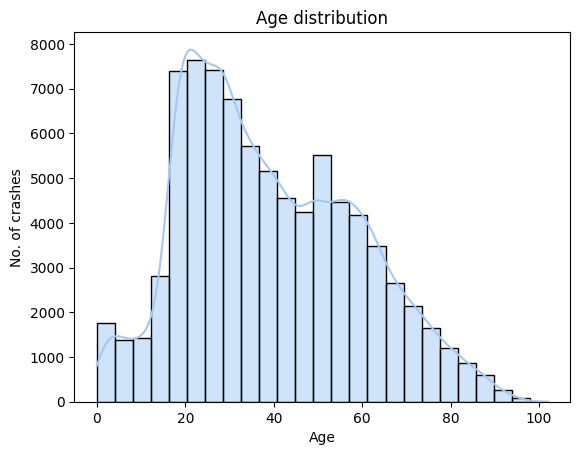

In [187]:
crash_age_histplot = sns.histplot(person_2020['AGE'], bins=25, kde=True)
crash_age_histplot.set(title = 'Age distribution', 
                       xlabel="Age", 
                       ylabel="No. of crashes")

[Text(0.5, 1.0, 'Age distribution'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'No. of crashes')]

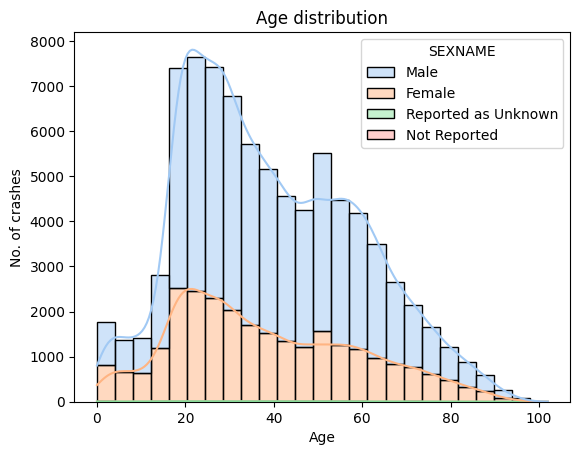

In [188]:
crash_age_histplot = sns.histplot(person_2020,
                                  x = 'AGE',
                                  hue='SEXNAME',
                                  multiple='stack',
                                  bins=25, 
                                  kde=True)
crash_age_histplot.set(title = 'Age distribution', 
                       xlabel="Age", 
                       ylabel="No. of crashes")

In [189]:
person_2020_cndsd = (
    person_2020[
    person_2020['PER_TYP']
    .isin([1, 2, 5, 6])
    ]
)

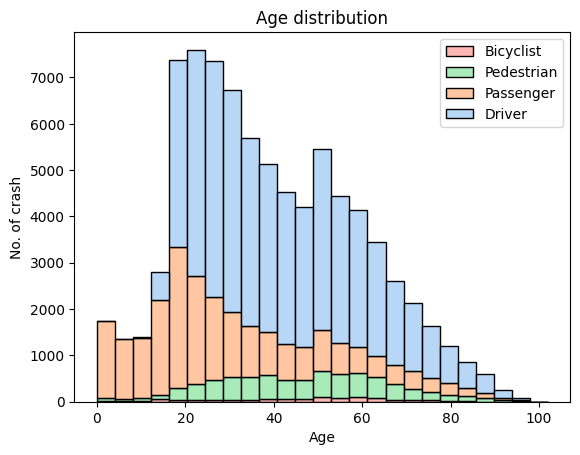

In [190]:
crash_age_histplot = sns.histplot(person_2020_cndsd,
                                  x = 'AGE',
                                  hue='PER_TYPNAME',
                                  multiple='stack',
                                  bins=25)
crash_age_histplot.set(title = 'Age distribution', 
                       xlabel="Age", 
                       ylabel="No. of crash")
crash_age_histplot.legend(labels = ['Bicyclist','Pedestrian', 'Passenger', 'Driver'])

In [191]:
person_2020['AGE'].value_counts().head()

20.0    2042
21.0    2015
19.0    1982
22.0    1921
18.0    1914
Name: AGE, dtype: int64

In [192]:
(
    (
        (person_2020['AGE']
         .value_counts()
         .head()
         .sum()
        )
        /
        (
            person_2020.shape[0]
        )
    )
    .round(2)
) * 100

11.0

Age group of 18-22 years have the higest vehicle crash accounting for 11 %.

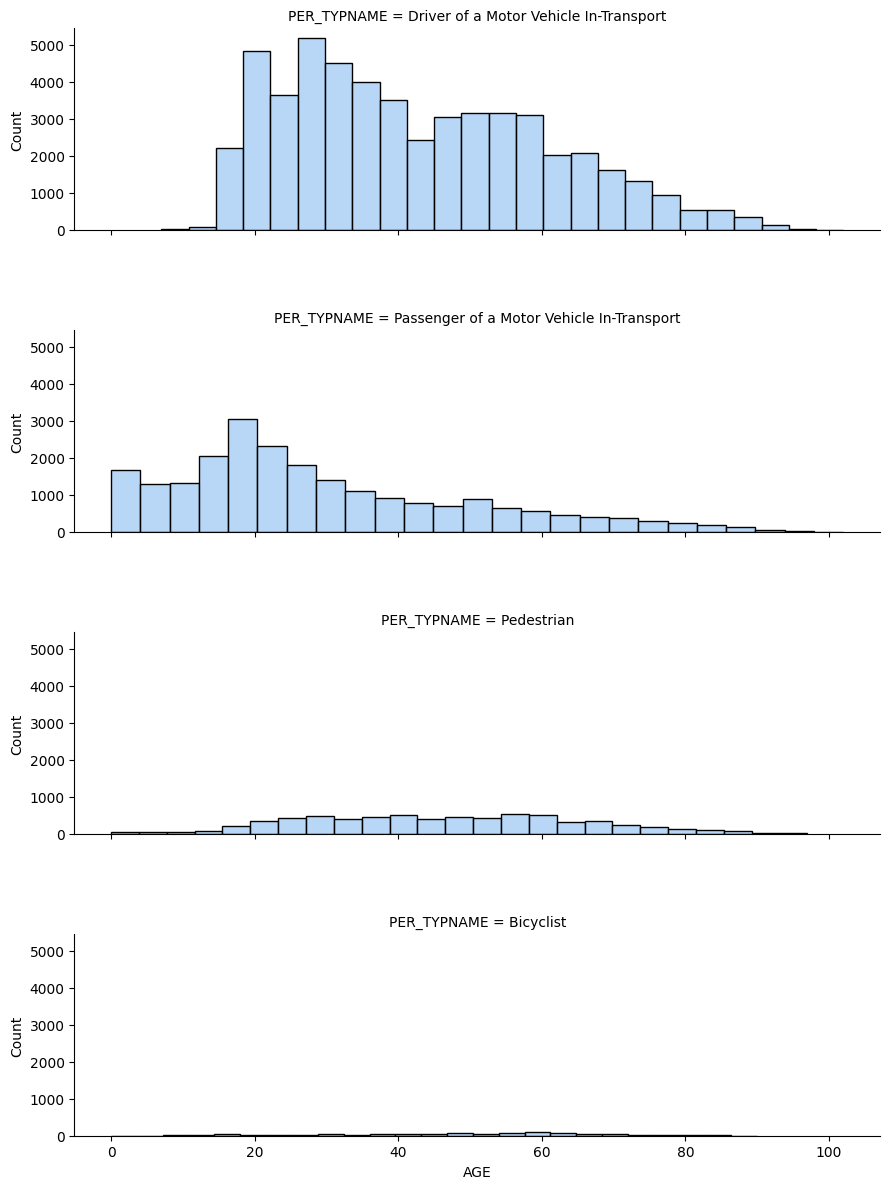

In [193]:
# Create a FacetGrid with vehicle_type as the row variable
g = sns.FacetGrid(person_2020_cndsd, row='PER_TYPNAME', aspect=3)

# Map a histogram plot of crash_count onto each row of the grid
g.map(sns.histplot, 'AGE', bins= 25)

# Adjust the spacing between rows and remove the titles for each row
g.fig.subplots_adjust(hspace=0.5)

### Crash severity distribution

In [194]:
val_count = person_2020['INJ_SEVNAME'].value_counts()
val_percentage = val_count/val_count.sum() * 100
crash_sev_df = pd.DataFrame({'count': val_count, 'percentage': val_percentage})

[Text(0.5, 1.0, 'Fatality distribution'), Text(0.5, 0, 'Percentage')]

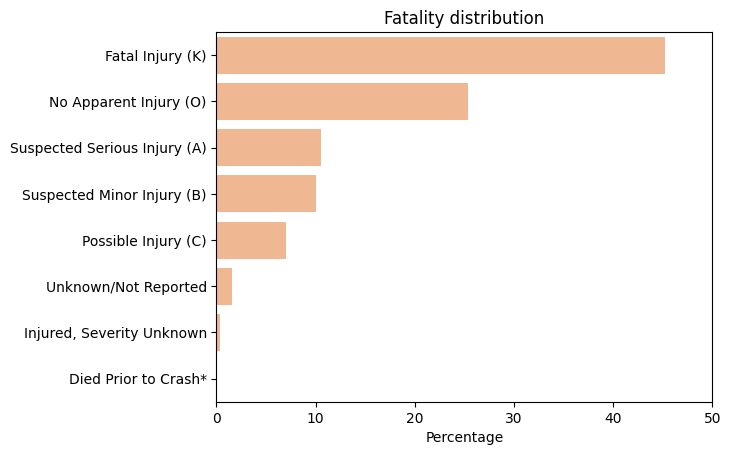

In [214]:
severity_plot = sns.barplot(x = 'percentage', 
            y = crash_sev_df.index, 
            data=crash_sev_df,
            orient='horizontal', 
           color = sns.color_palette("pastel")[1])
plt.xlim(0, 50)
severity_plot.set(title = 'Fatality distribution', 
        xlabel="Percentage")

### Vehicle crash grouped by highway category

[Text(0.5, 1.0, 'Road type distribution'), Text(0.5, 24.0, 'Percentage')]

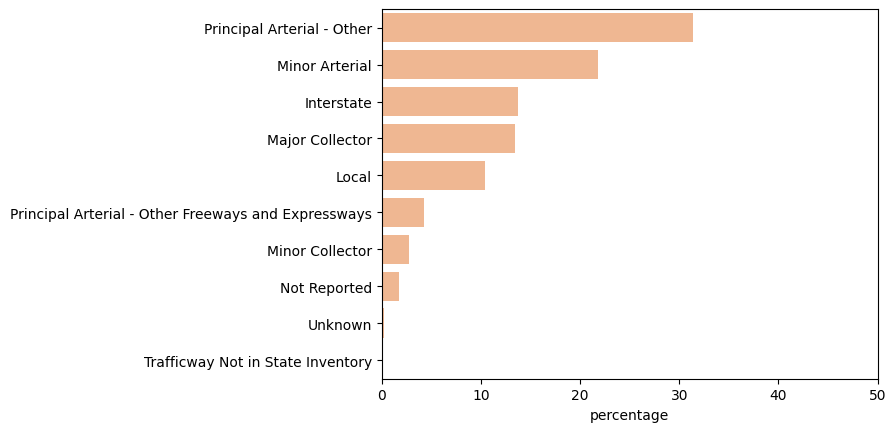

In [215]:
road_type = person_2020['FUNC_SYSNAME'].value_counts()
road_type_percentage = road_type/road_type.sum() * 100
road_type_df = pd.DataFrame({'count': road_type, 'percentage': road_type_percentage})

road_type_plot = sns.barplot(x = 'percentage', 
            y = road_type_df.index, 
            data=road_type_df,
            orient='horizontal', 
           color = sns.color_palette("pastel")[1])
plt.xlim(0, 50)
severity_plot.set(title = 'Road type distribution', 
        xlabel="Percentage")

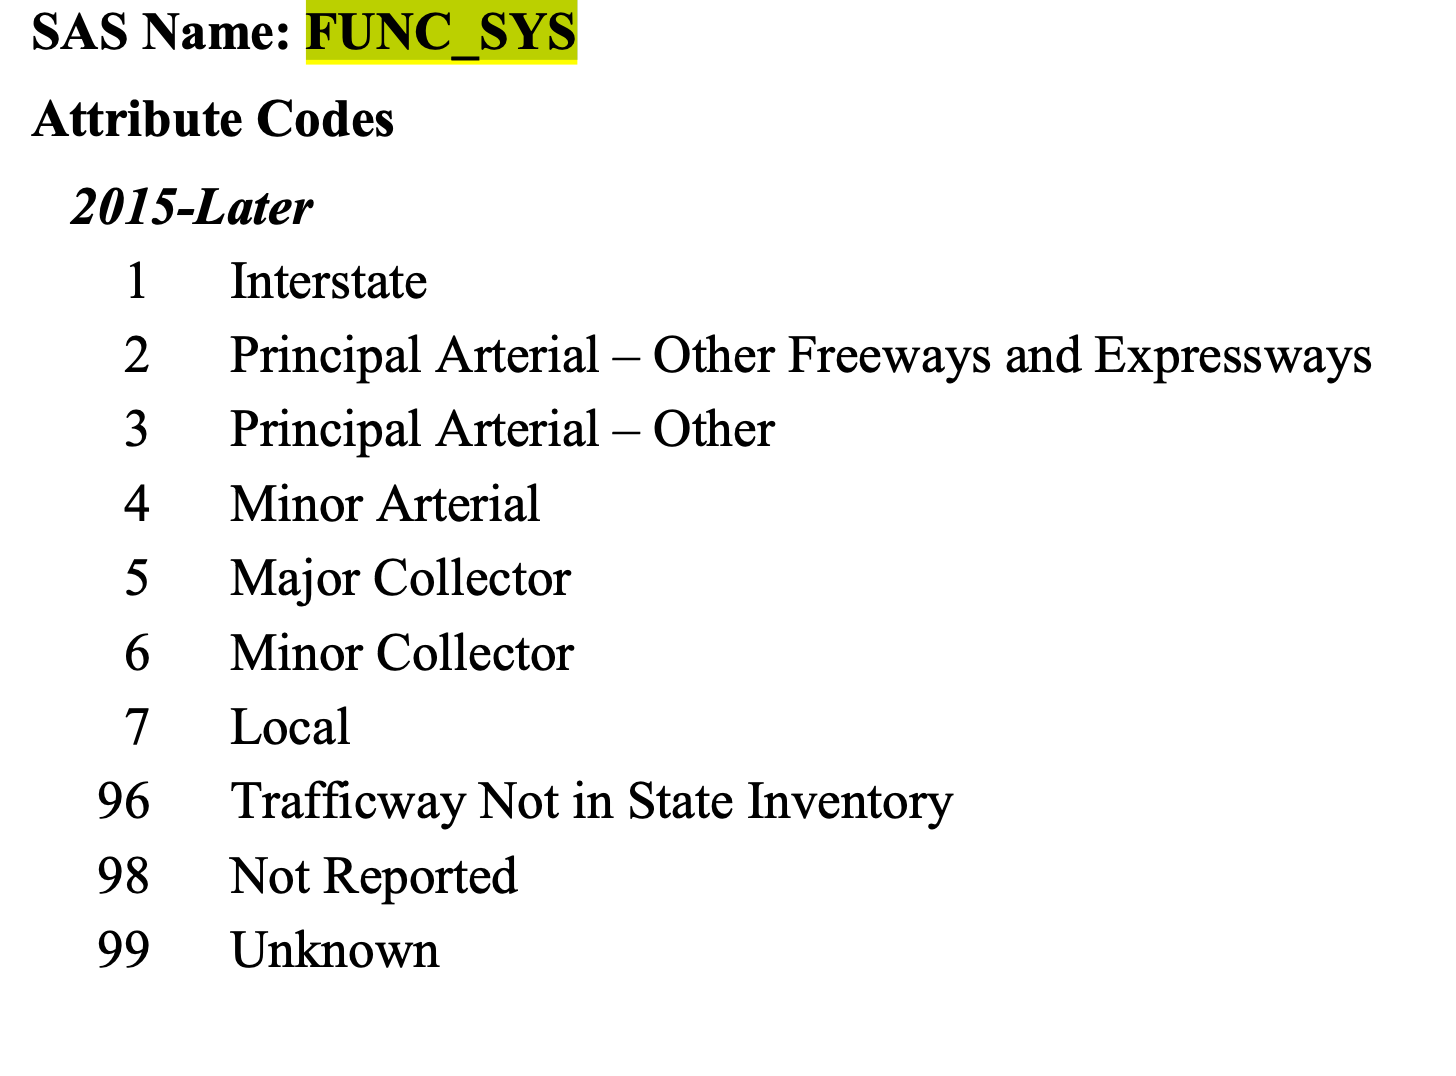

### What type of vehicle is mostly involved in crash?

### Where in vehicle does most fatality occur?

In [236]:
position = person_2020['SEAT_POSNAME'].value_counts().head()

(
    round(
        position/position
        .sum()*100, 2)
)

Front Seat, Left Side           66.02
Front Seat, Right Side          15.24
Not a Motor Vehicle Occupant     9.97
Second Seat, Right Side          4.39
Second Seat, Left Side           4.39
Name: SEAT_POSNAME, dtype: float64

81% of vehicle crash involves front seat occupants which is approximately 10 times more than the second seat occupants.

In [304]:
person_2020['INJ_SEVNAME'].value_counts()

Fatal Injury (K)                38824
No Apparent Injury (O)          21773
Suspected Serious Injury (A)     9051
Suspected Minor Injury (B)       8600
Possible Injury (C)              6038
Unknown/Not Reported             1322
Injured, Severity Unknown         275
Died Prior to Crash*                2
Name: INJ_SEVNAME, dtype: int64

In [305]:
seat_pos_code = [11, 13, 0, 21, 23]
inj_sev_code = [4, 0, 3, 2, 1]
seat_inj = (
    person_2020[
        (person_2020['SEAT_POS']
         .isin(seat_pos_code)) & (person_2020['INJ_SEV']
                                  .isin(inj_sev_code))
    ]
)

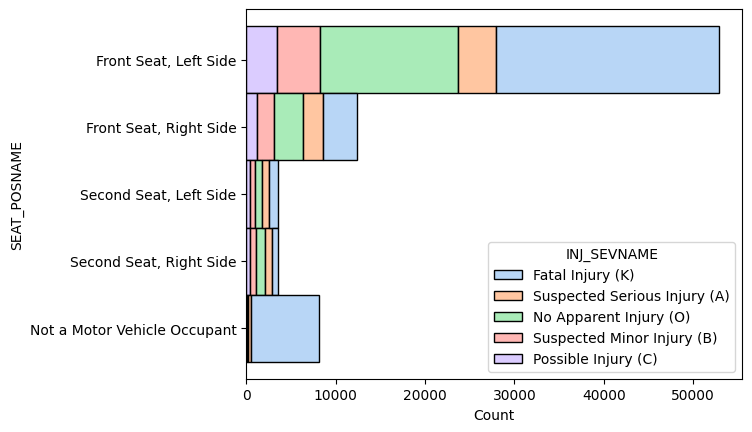

In [320]:
seat_inj_histplot = sns.histplot(seat_inj,
                                 y ='SEAT_POSNAME',
                                 hue = 'INJ_SEVNAME',
                                 multiple='stack')

Calculate injury severity distribution percentage for each seat position. Is there a huge variation in the percetage depending on seat position?

### Which state has the most crashes?

### What is the most common violation?

In [219]:
person_2020['SEAT_POSNAME'].unique()

array(['Front Seat, Left Side', 'Front Seat, Right Side',
       'Second Seat, Left Side', 'Second Seat, Right Side',
       'Second Seat, Middle', 'Not a Motor Vehicle Occupant',
       'Front Seat, Middle', 'Sleeper Section of Cab (Truck)',
       'Front Seat, Unknown',
       'Other Passenger in enclosed passenger or cargo area',
       'Third Seat, Middle', 'Third Seat, Left Side',
       'Third Seat, Right Side', 'Riding on Exterior of Vehicle',
       'Reported as Unknown', 'Not Reported',
       'Other Passenger in unenclosed passenger or cargo area',
       'Second Seat, Unknown', 'Front Seat, Other', 'Second Seat, Other',
       'Third Seat, Other',
       'Other Passenger in passenger or cargo area, unknown whether or not enclosed',
       'Third Seat, Unknown', 'Appended to a Motor Vehicle for Motion',
       'Fourth Seat, Left Side', 'Fourth Seat, Middle',
       'Fourth Seat, Right Side', 'Trailing Unit', 'Fourth Seat, Unknown'],
      dtype=object)

In [127]:
person_2020.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_FORMS', 'VEH_NO', 'PER_NO',
       'STR_VEH', 'COUNTY', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'HOUR',
       'HOURNAME', 'MINUTE', 'MINUTENAME', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'HARM_EV', 'HARM_EVNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'SCH_BUS', 'SCH_BUSNAME', 'AGE', 'AGENAME', 'SEX',
       'SEXNAME', 'PER_TYP', 'PER_TYPNAME', 'INJ_SEV', 'INJ_SEVNAME',
       'SEAT_POS', 'SEAT_POSNAME', 'REST_USE', 'REST_USENAME', 'REST_MIS',
       'REST_MISNAME', 'AIR_BAG', 'AIR_BAGNAME', 'EJECTION', 'EJECTIONNAME',
       'EJ_PATH', 'EJ_PATHNAME', 'EXTRICAT', 'EXTRICATNAME', 'DRINKING',
       'DRINKINGNAME', 'ALC_DET', 'ALC_DETNAME', 'ALC_STATUS',
       'ALC_STATUSNAME', 'ATST_TYP', 'ATST_TYPNAME', 'ALC_RES', 'ALC_RESNAME',
       'DRUGS', 'DRUGSNAME', 'DRUG_DET', 'DRUG_DETNAME', 'DSTATUS',
       'DSTATUSNAME', 'HOSPITAL', 'HOSPITALNAME', 'DOA', 'DOANAME', 'DEATH_DA',
       'DEATH_DANAME', 'DEATH_MO', 'DEATH_MONAME', 

1. Distribution of accidents over days of week
2. Distribution of accidents over 24 hrs
3. Distribution of accidents over months in a year

5. Types of vehicle

7. Crash severity distribution

9. Where does the most fatalitites occured in vehicle?##

10. What restraints are used and how do they correlate with severity of crash?
Alcohol tested? What type of test is used? What is the result?
Drug tested? What type of test is used? What is the result?

11. What is the effect of airbags?

12. What is the correlation between alcohol/drug (BAC level etc.) and severity of crash?

13. When did most fatalities occur after crash?

14. Plot accident on a map?

15. Which state has the most crashes?

16. What is the most common violation?

In [37]:
# import psutil

# process = psutil.Process()z
# memory_info = process.memory_info()
# print(f"Memory used by Jupyter Lab: {memory_info.rss / 1024 / 1024:.2f} MB")